In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
base_dir = "../results/wind/"
scales = ['1', '5', '10']
scale_labels = {'1': '1%', '5': '5%', '10': '10%'}

rmse_results = []

for scale in scales:
    folder = os.path.join(base_dir, scale.replace('0.', ''))
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder, file))
            rmse_results.append({
                "Scale": f"{int(float(scale))}%",
                "Run": int(df['run'].values[0]),
                "RMSE": df['rmse'].values[0],
                "Model": "S2RMS"
            })

s2rms_df = pd.DataFrame(rmse_results)

summary_df = s2rms_df.groupby("Scale")["RMSE"].agg(["mean", "std"]).reset_index()
print("S2RMS Statistics:")
display(summary_df)

S2RMS Statistics:


,Scale,mean,std
0,1%,196058.540440,27957.040478
1,10%,235782.366587,95374.845334
2,5%,203979.279430,34023.240763


In [13]:
with open("../results/elasticnet_semisupervised_scores.json") as f:
    elastic = json.load(f)

with open("../results/xgboost_semisupervised_scores.json") as f:
    xgboost = json.load(f)

baseline_data = []

for scale in ['1%', '5%', '10%']:
    baseline_data.append({
        "Scale": scale,
        "Run": "avg",
        "RMSE": elastic[scale]['RMSE'],
        "Model": "ElasticNet"
    })
    baseline_data.append({
        "Scale": scale,
        "Run": "avg",
        "RMSE": xgboost[scale]['RMSE'],
        "Model": "XGBoost"
    })

baseline_df = pd.DataFrame(baseline_data)


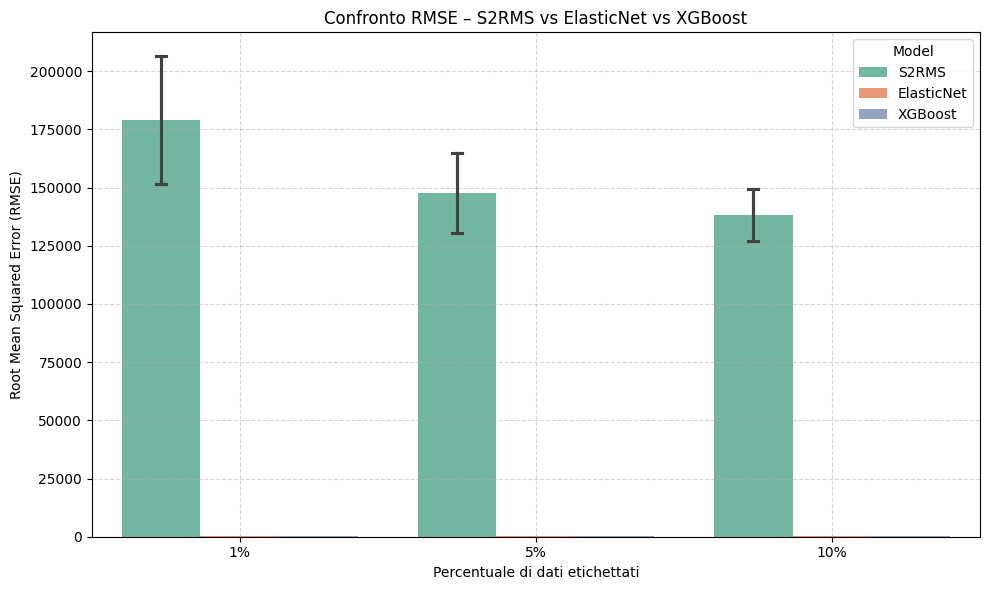

In [14]:
combined_df = pd.concat([s2rms_df, baseline_df], ignore_index=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="Scale", y="RMSE", hue="Model", errorbar='sd', capsize=0.1, palette="Set2")
plt.title("Confronto RMSE – S2RMS vs ElasticNet vs XGBoost")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Percentuale di dati etichettati")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()